In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("Netflix_Userbase.csv")

print("Dataset structure:")
print(data.head())
print("\nDataset shape:", data.shape)

Dataset structure:
   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  

Dataset shape: (2500, 10)


In [ ]:
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [ ]:
categorical_features = ['Gender', 'Subscription Type']
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_features = one_hot_encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))

data_encoded = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)

print("\nEncoded dataset:")
print(data_encoded.head())



Encoded dataset:
   User ID  Monthly Revenue Join Date Last Payment Date         Country  Age  \
0        1               10  15-01-22          10-06-23   United States   28   
1        2               15  05-09-21          22-06-23          Canada   35   
2        3               12  28-02-23          27-06-23  United Kingdom   42   
3        4               12  10-07-22          26-06-23       Australia   51   
4        5               10  01-05-23          28-06-23         Germany   33   

       Device Plan Duration  Gender_Female  Gender_Male  \
0  Smartphone       1 Month            0.0          1.0   
1      Tablet       1 Month            1.0          0.0   
2    Smart TV       1 Month            0.0          1.0   
3      Laptop       1 Month            1.0          0.0   
4  Smartphone       1 Month            0.0          1.0   

   Subscription Type_Basic  Subscription Type_Premium  \
0                      1.0                        0.0   
1                      0.0      

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
selected_features = ['Age', 'Gender_Female', 'Gender_Male', 'Subscription Type_Basic', 'Subscription Type_Premium']
print("Descriptive Statistics:")
print(data.describe())
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000
Descriptive Statistics:
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


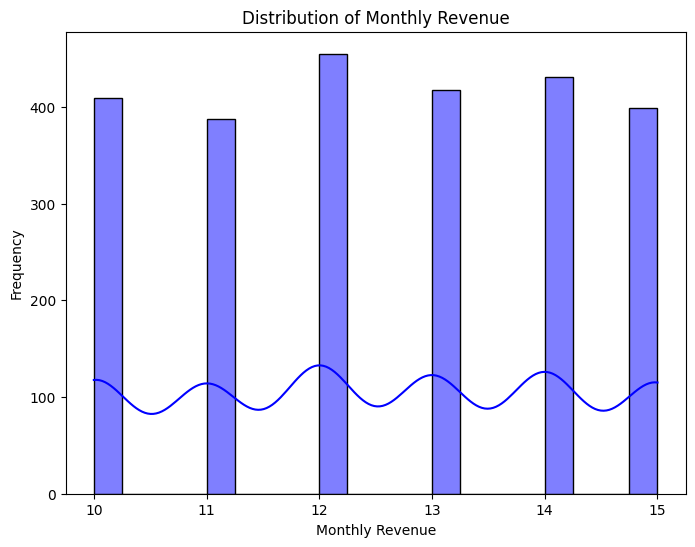

<ipython-input-8-bfb60eed75d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Age'], palette='viridis')


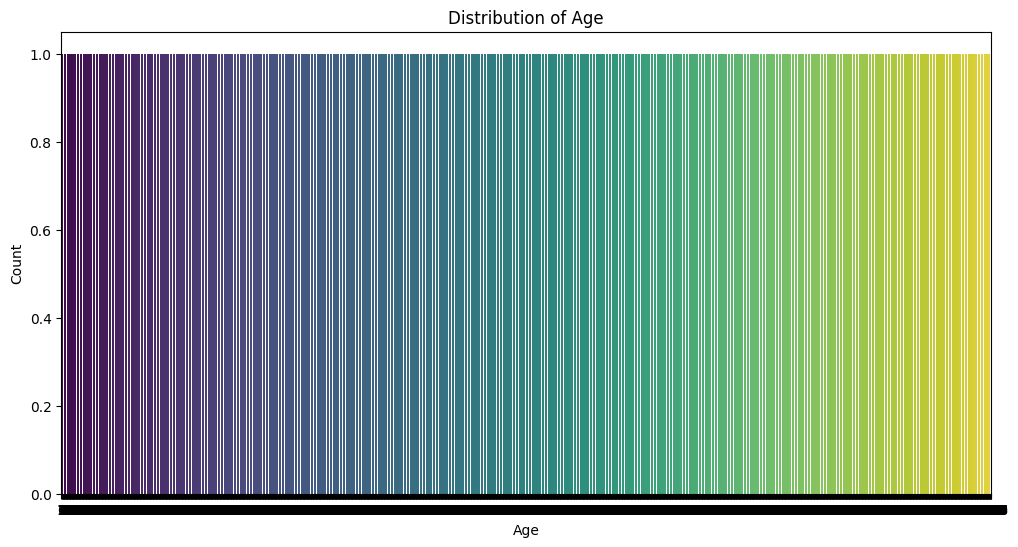

<ipython-input-8-bfb60eed75d0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Gender'], palette='magma')


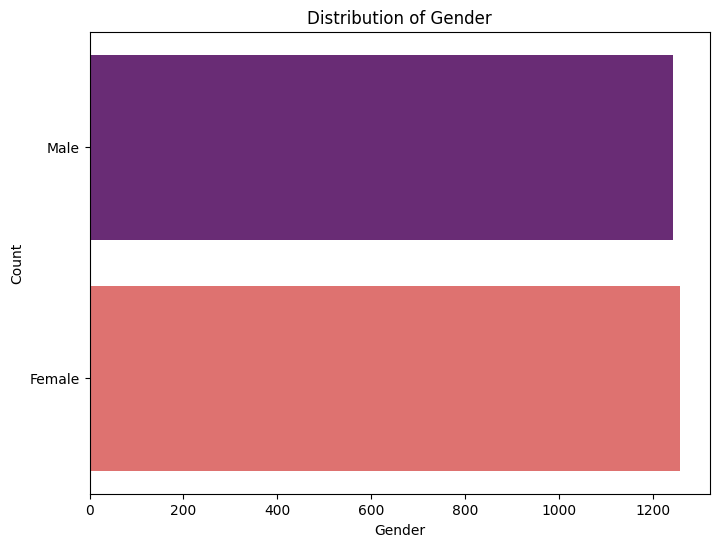

<ipython-input-8-bfb60eed75d0>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Subscription Type'], palette='plasma')


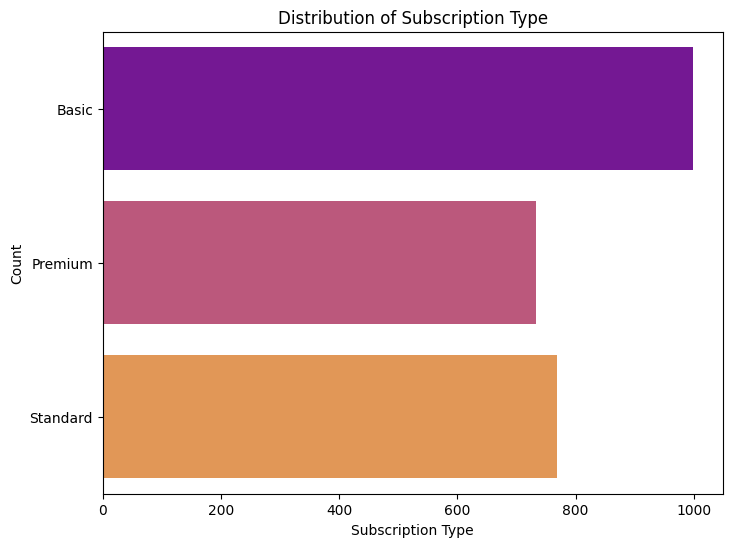

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Monthly Revenue'], bins=20, kde=True, color='blue')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data['Age'], palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data['Gender'], palette='magma')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data['Subscription Type'], palette='plasma')
plt.title('Distribution of Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()


<ipython-input-9-75379b7e0169>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Age'], palette='viridis')


<Axes: ylabel='count'>

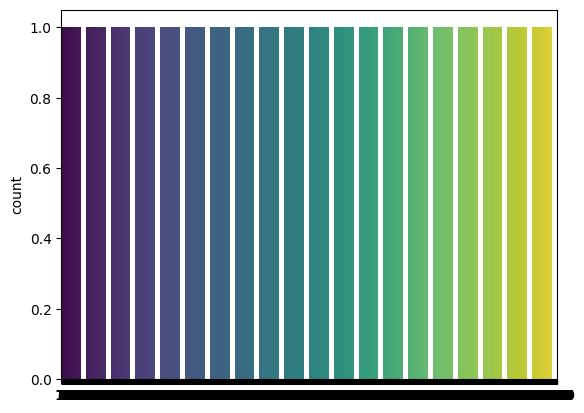

In [ ]:
sns.countplot(data['Age'], palette='viridis')

<ipython-input-10-cba5cadbb769>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Gender'], palette='magma')


<Axes: xlabel='count', ylabel='Gender'>

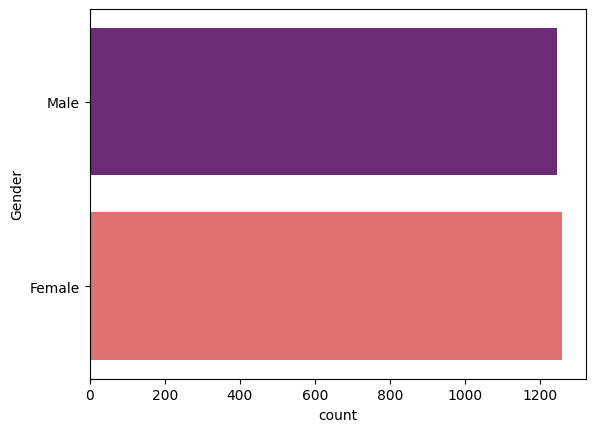

In [ ]:
sns.countplot(data['Gender'], palette='magma')

<ipython-input-11-ef32c1eecc03>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Subscription Type'], palette='plasma')


<Axes: xlabel='count', ylabel='Subscription Type'>

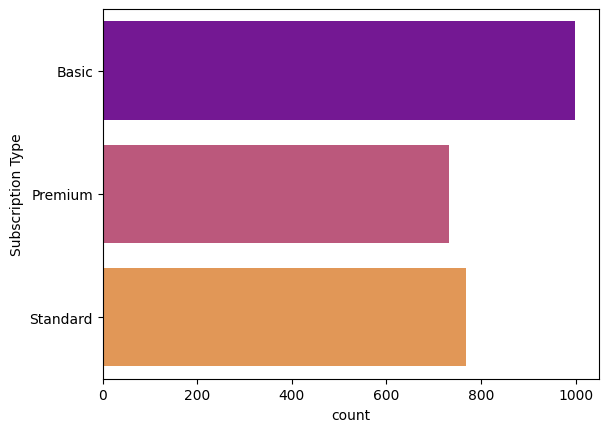

In [ ]:
sns.countplot(data['Subscription Type'], palette='plasma')

In [ ]:
selected_features = ['Age']

X = data_encoded[selected_features]
y = data_encoded['Monthly Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Model Evaluation:
Mean Squared Error (MSE): 2.7813087733291315
Root Mean Squared Error (RMSE): 1.667725628911762
R-squared (R2): -0.006933994071707472


In [ ]:
selected_features = ['Age', 'Gender_Female', 'Gender_Male', 'Subscription Type_Basic', 'Subscription Type_Premium']

X = data_encoded[selected_features]
y = data_encoded['Monthly Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation:
Accuracy: 0.18
Precision: 0.16019664092519253
Recall: 0.18
F1 Score: 0.15295601840833656

Confusion Matrix:
[[10  5 37 12  8 13]
 [12  3 37 16  5  6]
 [14  4 46  9  9 11]
 [16  4 36 15 11  6]
 [13  4 47  6  3 12]
 [11  3 25 12  6 13]]


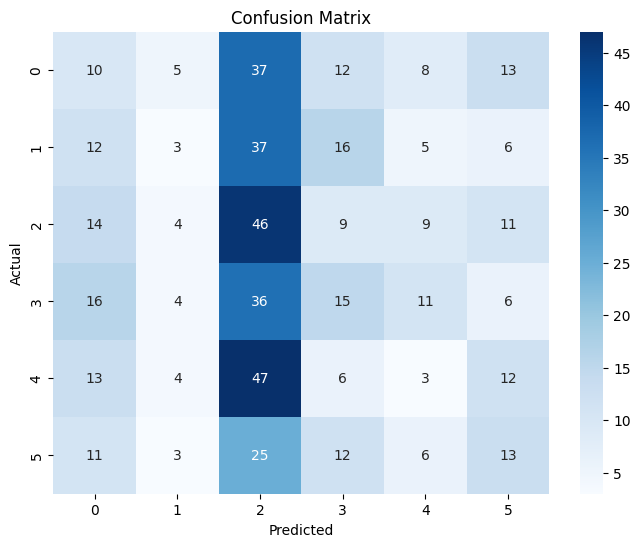

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()